In [ ]:
import os
import pandas as pd
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

num_topics=6


## read txt and cleaned txt
full_info=[]
words_ls=[]
t_list = os.listdir('C:/Users/10292/Downloads/news_txt')
for t in t_list:
    with open(f"C:/Users/10292/Downloads/news_txt_cleaned/{t}",encoding="utf-8") as f:
        words = f.readlines()[0].split()
    words_ls.append(words)



dictionary = corpora.Dictionary(words_ls)
stopword=['香港','移民','港人','潮']
stop_ids = [dictionary.token2id[s] for s in stopword if s in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
corpus = [dictionary.doc2bow(words) for words in words_ls]


In [ ]:
# Load a potentially pretrained model from disk.
from gensim.test.utils import datapath

temp_file = datapath("/Users/10292/Desktop/topic modeling/LDA 0717/Model/model 1")

lda = models.ldamodel.LdaModel.load(temp_file)

In [ ]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

In [ ]:
# Save model to disk.
lda.save(temp_file)

In [ ]:
coherence_u_mass = CoherenceModel(model=lda, texts=words_ls, dictionary=dictionary, coherence='u_mass')
print(coherence_u_mass.get_coherence())

-1.1429948212524603


In [ ]:
# 打印所有主题，每个主题显示100个词
result=pd.DataFrame(lda.show_topics(num_topics=num_topics, num_words=100, log=False, formatted=False))
frame=[]
for i in range(num_topics):
    frame.append(pd.DataFrame(result[1][i],columns=[f'topic {i+1}',f'topic {i+1} value']))
topic_result = pd.concat(frame,axis=1)
topic_result.to_csv(f'{num_topics} topics.csv',encoding="utf-8-sig",index=False)


In [ ]:
train_vecs = []
max_vecs=[]


for i in range(len(corpus)):
    top_topics = lda.get_document_topics(corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    max_vecs.append([t_list[i],np.argmax(topic_vec)+1,max(topic_vec)])
    train_vecs.append(topic_vec)


In [ ]:
max_vecs_df =pd.DataFrame(max_vecs,columns=['title','dominant_topic','contribution'])


In [ ]:
for i in range(1,num_topics+1):
    max_vecs_df.groupby('dominant_topic').get_group(i).sort_values(by=['contribution'],ascending=False).to_csv(f'ranked articles for the dominant topic {i}.csv',encoding="utf-8-sig",index=False)

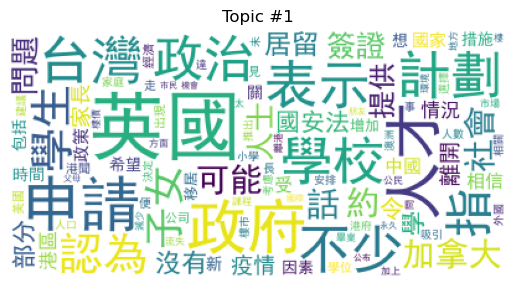

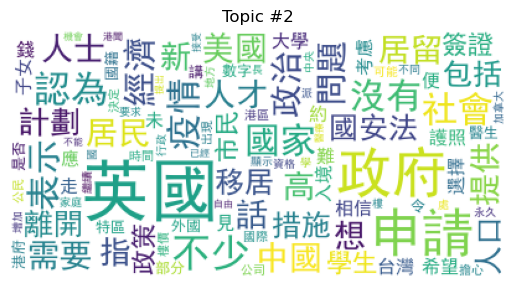

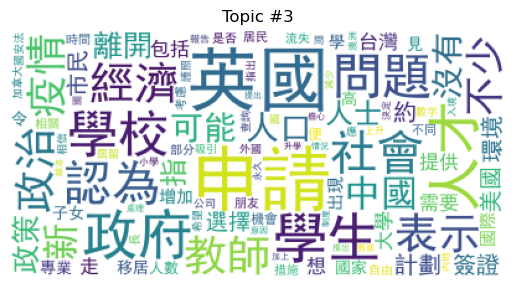

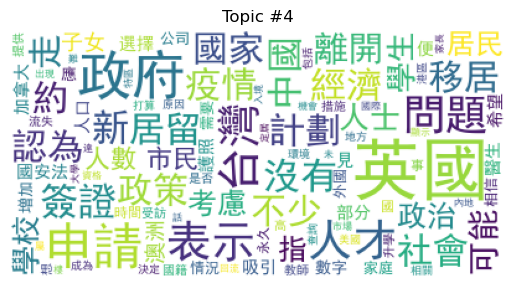

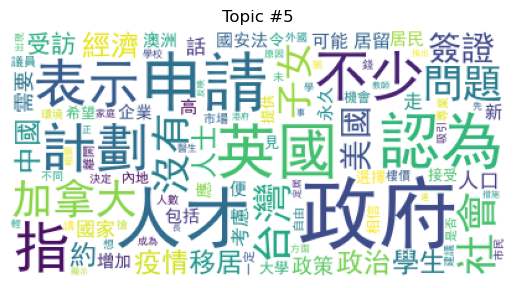

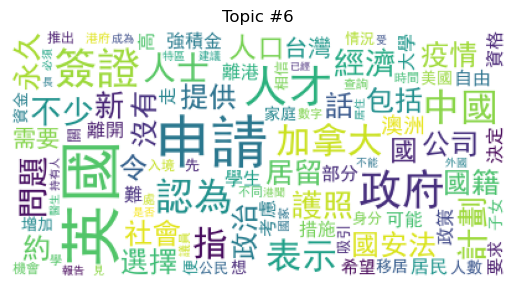

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud

for t in range(lda.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color="white",
    font_path='simhei.ttf').fit_words(dict(lda.show_topic(t, 100))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1))
    plt.show()

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary=lda.id2word)
vis

C:\Users\10292\anaconda3\envs\lda\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.002918  0.006065       1        1  30.220724
2      0.006084 -0.005028       2        1  19.005168
1     -0.009069  0.007849       3        1  15.687477
5     -0.012431 -0.010482       4        1  14.197195
4      0.007173  0.007181       5        1  11.725125
0      0.011161 -0.005586       6        1   9.164311, topic_info=     Term         Freq        Total Category  logprob  loglift
833    英國  4171.000000  4171.000000  Default  30.0000  30.0000
457    申請  2702.000000  2702.000000  Default  29.0000  29.0000
11     人才  1788.000000  1788.000000  Default  28.0000  28.0000
338    政府  2529.000000  2529.000000  Default  27.0000  27.0000
521    學校   870.000000   870.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
3344  國安法    73.440532   767.967494   Topic6  -6.1996   0.0426
464    簽證    86.875666  1215.079827   Topic6  -6.0316  -0.2482
307    問題    85.429134  1289.330246   Topic6  -6.0484  -0.3243
560    沒有    74.934054  1073.091464   Topic6  -6.1795  -0.2718
1677   疫情    68.183116  1018.013801   Topic6  -6.2739  -0.3136

[560 rows x 6 columns], token_table=       Topic      Freq Term
term                       
936        1  0.308286   一定
936        2  0.176519   一定
936        3  0.149171   一定
936        4  0.106906   一定
936        5  0.166574   一定
...      ...       ...  ...
4040       6  0.058387  黃秋生
17060      1  0.706570  黎穎瑜
17060      3  0.141314  黎穎瑜
17060      5  0.141314  黎穎瑜
11140      1  0.500536  黨政軍

[1486 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 6, 5, 1])

In [ ]:
import shutil
import os
n_list = os.listdir('C:/Users/10292/Downloads/news')
for i in range(num_topics):
    if not os.path.exists(f'C:/Users/10292/Downloads/topic {i+1}'):
        os.makedirs(f'C:/Users/10292/Downloads/topic {i+1}')
for i in range(len(max_vecs)):
    shutil.move(f'C:/Users/10292/Downloads/news_txt - Copy/{t_list[i]}',
                f'C:/Users/10292/Downloads/topic {max_vecs[i][1]}/{t_list[i]}')
